In [5]:
import time
import datetime
from epics import caget, caput, PV
import matplotlib.pyplot as plt

from image import Image
from beam_io import saveimage

from IPython.display import clear_output

In [39]:
#caput("OTRS:IN20:571:ROI_XNP_SET", 19)

1

In [29]:
#caput("OTRS:IN20:571:ROI_YNP_SET", 140)

1

In [2]:
nrow = caget("OTRS:IN20:571:ROI_XNP")
ncol = caget("OTRS:IN20:571:ROI_YNP")
# nrow = caget("OTRS:IN20:571:N_ROW")
# ncol = caget("OTRS:IN20:571:N_COL")
ncol, nrow

(432, 432)

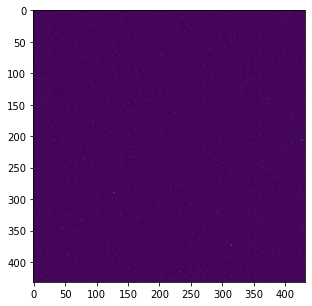

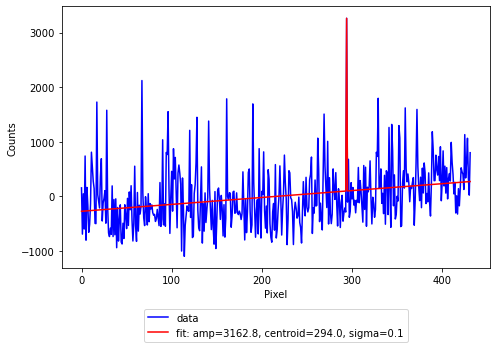

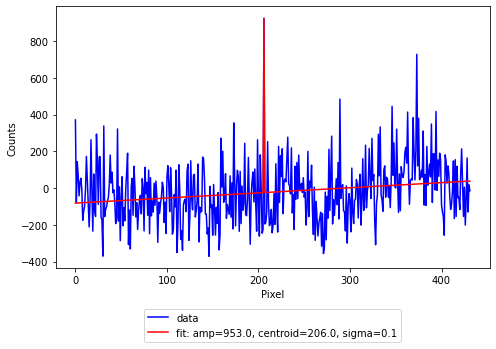

In [15]:
while True:
    im = caget("OTRS:IN20:571:IMAGE")
    beam_image = Image(im, ncol, nrow, bg_image = None) 
    beam_image.reshape_im()
    #print(beam_image.proc_image.shape)
    beam_image.proc_image = beam_image.proc_image#[200:900, 1000:]
    plt.figure(figsize = (15,5))
    plt.imshow(beam_image.proc_image)
    beam_image.get_im_projection();
    beamsizes = beam_image.get_sizes(show_plots=True)
    #saveimage(im, ncol, nrow, beamsizes)
    plt.close()

    time.sleep(3)
    clear_output(wait=True)
    break

In [6]:
caget("OTRS:IN20:571:XRMS"),caget("OTRS:IN20:571:YRMS")

(35.59548460983069, 26.092062092412526)

In [10]:
print(PV("OTRS:IN20:571:XRMS").info)

== OTRS:IN20:571:XRMS  (time_double) ==
   value      = 35.5955
   char_value = '35.595'
   count      = 1
   nelm       = 1
   type       = time_double
   units      = um
   precision  = 3
   host       = lcls-daemon1.slac.stanford.edu:41994
   access     = read/write
   status     = 0
   char_status= NO_ALARM
   severity   = 0
   char_severity       = NO_ALARM
   timestamp  = 1634982287.628 (2021-10-23 02:44:47.62802)
   posixseconds        = 1634982287.0
   nanoseconds= 628023825
   upper_ctrl_limit    = 0.0
   lower_ctrl_limit    = 0.0
   upper_disp_limit    = 0.0
   lower_disp_limit    = 0.0
   upper_alarm_limit   = nan
   lower_alarm_limit   = nan
   upper_warning_limit = nan
   lower_warning_limit = nan
   PV is internally monitored, with 0 user-defined callbacks:


In [14]:
from beam_io import get_updated_beamsizes

get_updated_beamsizes(1,True)

(35.59548460983069, 26.092062092412526, 0, 0)